In [1]:
import csv
import matplotlib.pyplot as plt

In [9]:
path = "outputs/metrics.csv"
with open(path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader] 

object_unique = set()
for row in data:
    object_unique.add(row['object_id'])

print(f"Unique objects: {len(object_unique)}")
for obj in object_unique:
    print(" - " + obj)


Unique objects: 6
 - unconverged_252119
 - 441708
 - 252119
 - 64764
 - unconverged_441708
 - unconverged_64764


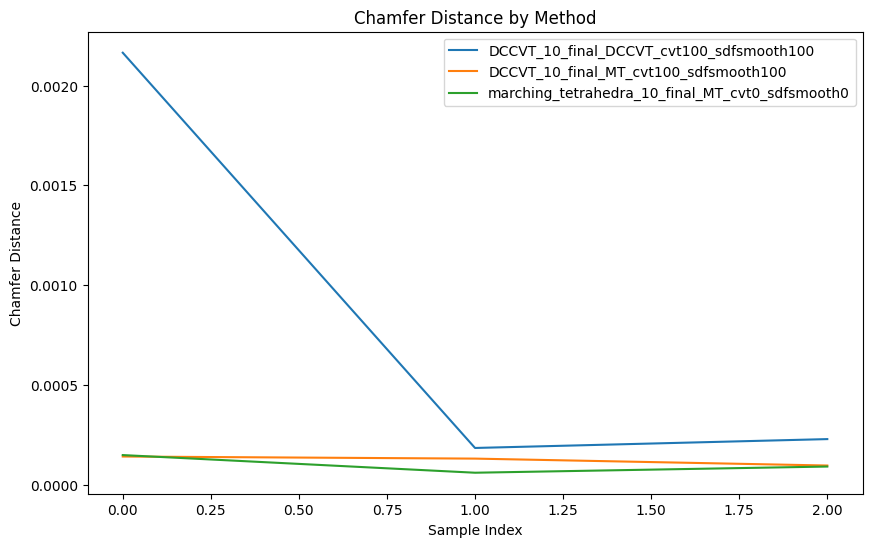

In [ ]:
methods = {}

for row in data:
    method = row['method']
    if method not in methods:
        methods[method] = {"converged" : [], "unconverged" : []}

    if "unconverged" in row['object_id']:
        methods[method]["unconverged"].append(float(row['chamfer_distance']))
    else:
        methods[method]["converged"].append(float(row['chamfer_distance']))

# Remove all methods with "init" in their name
methods = {k: v for k, v in methods.items() if 'init' not in k}
# Remove voromesh from the methods
methods = {k: v for k, v in methods.items() if 'voromesh' not in k}

plt.figure(figsize=(10, 6))
for method, distances in methods.items():
    # if "_0_" in method:
    #     continue
    if "_final_DCCVT_cvt0" in method:
        continue
    plt.plot(distances["converged"], label=method)
plt.xlabel('Sample Index')
plt.ylabel('Chamfer Distance')
plt.title('Chamfer Distance by Method')
plt.legend()
plt.show()